# Titanic - Machine Learning from Disaster - Kaggle

This is a Kaggle's competicion

The challenge is use machine learning to create a model that predicts which passengers survived the Titanic shipwreck

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LogisticRegression

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def transformSex(valor):
    if valor == 'female':
        return 1 
    else: 
        return 0

# Data preparation

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train['Sex_bin'] = train['Sex'].map(transformSex)
test['Sex_bin'] = test['Sex'].map(transformSex)

variable = ['Sex_bin','Age']

x = train[variable].fillna(-1)
y = train['Survived']

# Model 01

Random Forest with 2 variables

In [4]:
result = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for row_train, row_valid in kf.split(x):
    x_train, x_valid = x.iloc[row_train], x.iloc[row_valid]
    y_train, y_valid = y.iloc[row_train], y.iloc[row_valid]

    model = RandomForestClassifier(n_estimators=100, n_jobs=-1,random_state=0)
    model.fit(x_train,y_train)

    p = model.predict(x_valid)

    acc = np.mean(y_valid == p)
    result.append(acc)  

In [5]:
np.mean(result)

0.759601451100922

(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <BarContainer object of 10 artists>)

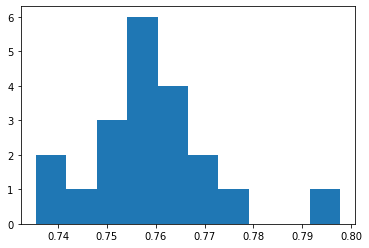

In [6]:
pylab.hist(result)

# Model 02

Random Forest with 6 variables

In [7]:
variable = ['Sex_bin','Age','Pclass', 'SibSp', 'Parch', 'Fare']

x = train[variable].fillna(-1)
y = train['Survived']

In [8]:
result = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for row_train, row_valid in kf.split(x):
    x_train, x_valid = x.iloc[row_train], x.iloc[row_valid]
    y_train, y_valid = y.iloc[row_train], y.iloc[row_valid]

    model = RandomForestClassifier(n_estimators=100, n_jobs=-1,random_state=0)
    model.fit(x_train,y_train)

    p = model.predict(x_valid)

    acc = np.mean(y_valid == p)
    result.append(acc) 

In [9]:
np.median(result)

0.803370786516854

(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

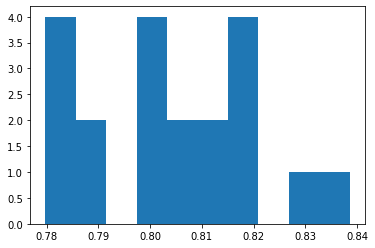

In [10]:
pylab.hist(result)

# Model 03

Logistic Regression with 6 variables

In [11]:
result = []
kf = RepeatedKFold(n_splits=2, n_repeats=7, random_state=10)

for row_train, row_valid in kf.split(x):
    x_train, x_valid = x.iloc[row_train], x.iloc[row_valid]
    y_train, y_valid = y.iloc[row_train], y.iloc[row_valid]

    model = LogisticRegression()
    
    model.fit(x_train,y_train)

    p = model.predict(x_valid)

    acc = np.mean(y_valid == p)
    result.append(acc) 

In [12]:
np.median(result)

0.7912455282914295